In [1]:
##import libraries
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

*loading the dataset*

In [2]:
train_dir= '../input/animals-detection-images-dataset/train'
test_dir='../input/animals-detection-images-dataset/test'

**some Basic EDA**

Lion sample size :  208 

Camel sample size :  67 

Cheetah sample size :  132 

Crocodile sample size :  108 

Deer sample size :  327 

Elephant sample size :  155 

Fox sample size :  148 

Giraffe sample size :  298 

Jaguar sample size :  100 

Leopard sample size :  123 

Tiger sample size :  313 

Zebra sample size :  181 

training data size : 2160


<BarContainer object of 12 artists>

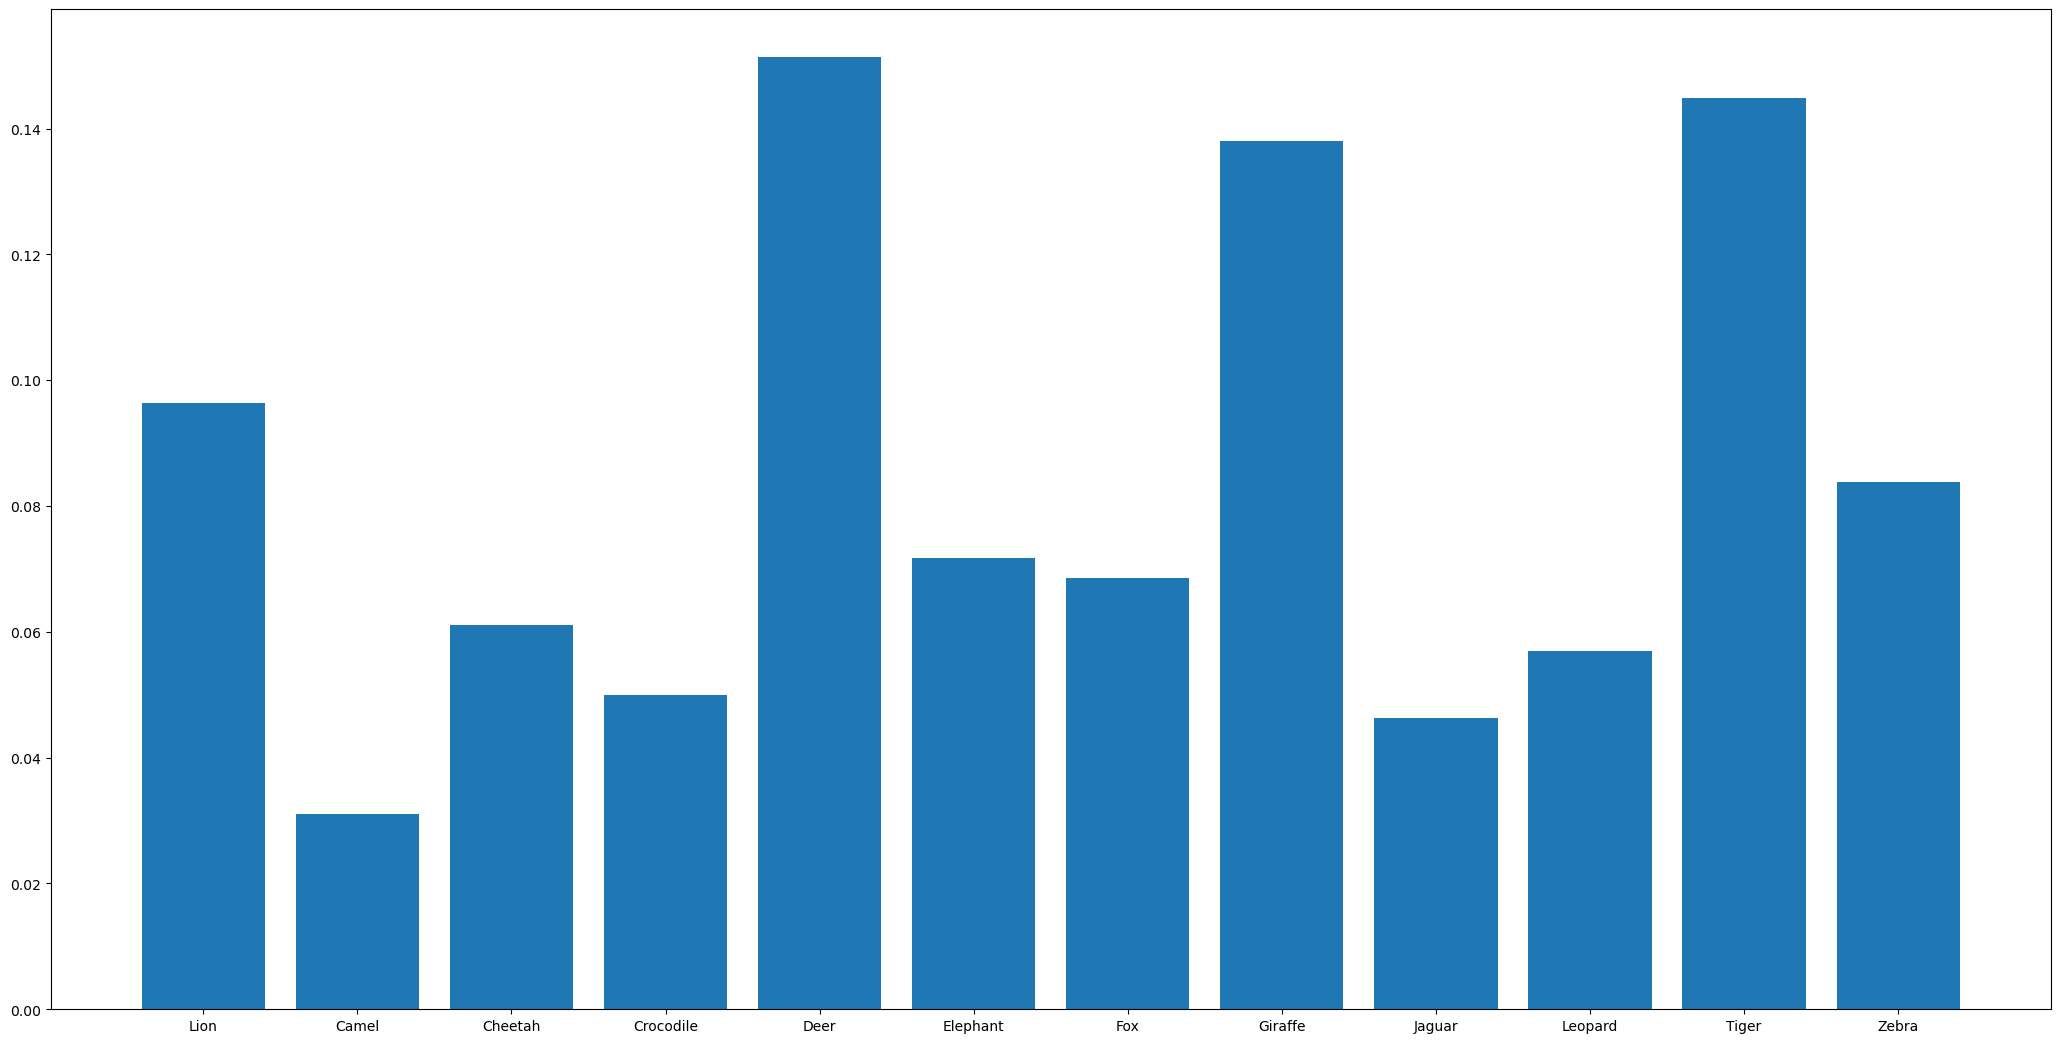

In [3]:
##CALCULATING TOTAL NO OF IMAGES
training_images_files_names_Lion = len(os.listdir("../input/animals-detection-images-dataset/train/Lion"))-1
training_images_files_names_Camel = len(os.listdir("../input/animals-detection-images-dataset/train/Camel"))-1
training_images_files_names_Cheetah = len(os.listdir("../input/animals-detection-images-dataset/train/Cheetah"))-1
training_images_files_names_Crocodile = len(os.listdir("../input/animals-detection-images-dataset/train/Crocodile"))-1
training_images_files_names_Deer = len(os.listdir("../input/animals-detection-images-dataset/train/Deer"))-1
training_images_files_names_Elephant = len(os.listdir("../input/animals-detection-images-dataset/train/Elephant"))-1
training_images_files_names_Fox = len(os.listdir("../input/animals-detection-images-dataset/train/Fox"))-1
training_images_files_names_Giraffe = len(os.listdir("../input/animals-detection-images-dataset/train/Giraffe"))-1
training_images_files_names_Jaguar = len(os.listdir("../input/animals-detection-images-dataset/train/Jaguar"))-1
training_images_files_names_Leopard = len(os.listdir("../input/animals-detection-images-dataset/train/Leopard"))-1
training_images_files_names_Tiger = len(os.listdir("../input/animals-detection-images-dataset/train/Tiger"))-1
training_images_files_names_Zebra = len(os.listdir("../input/animals-detection-images-dataset/train/Zebra"))-1
print("Lion sample size : ",training_images_files_names_Lion,"\n")
print("Camel sample size : ",training_images_files_names_Camel,"\n")
print("Cheetah sample size : ",training_images_files_names_Cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_Crocodile,"\n")
print("Deer sample size : ",training_images_files_names_Deer,"\n")
print("Elephant sample size : ",training_images_files_names_Elephant,"\n")
print("Fox sample size : ",training_images_files_names_Fox,"\n")
print("Giraffe sample size : ",training_images_files_names_Giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_Jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_Leopard,"\n")
print("Tiger sample size : ",training_images_files_names_Tiger,"\n")
print("Zebra sample size : ",training_images_files_names_Zebra,"\n")
training_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"],occurences)


Lion sample size :  100 

Camel sample size :  27 

Cheetah sample size :  35 

Crocodile sample size :  76 

Deer sample size :  177 

Elephant sample size :  33 

Fox sample size :  69 

Giraffe sample size :  23 

Jaguar sample size :  38 

Leopard sample size :  57 

Tiger sample size :  26 

Zebra sample size :  31 

validation data size: 2160


<BarContainer object of 12 artists>

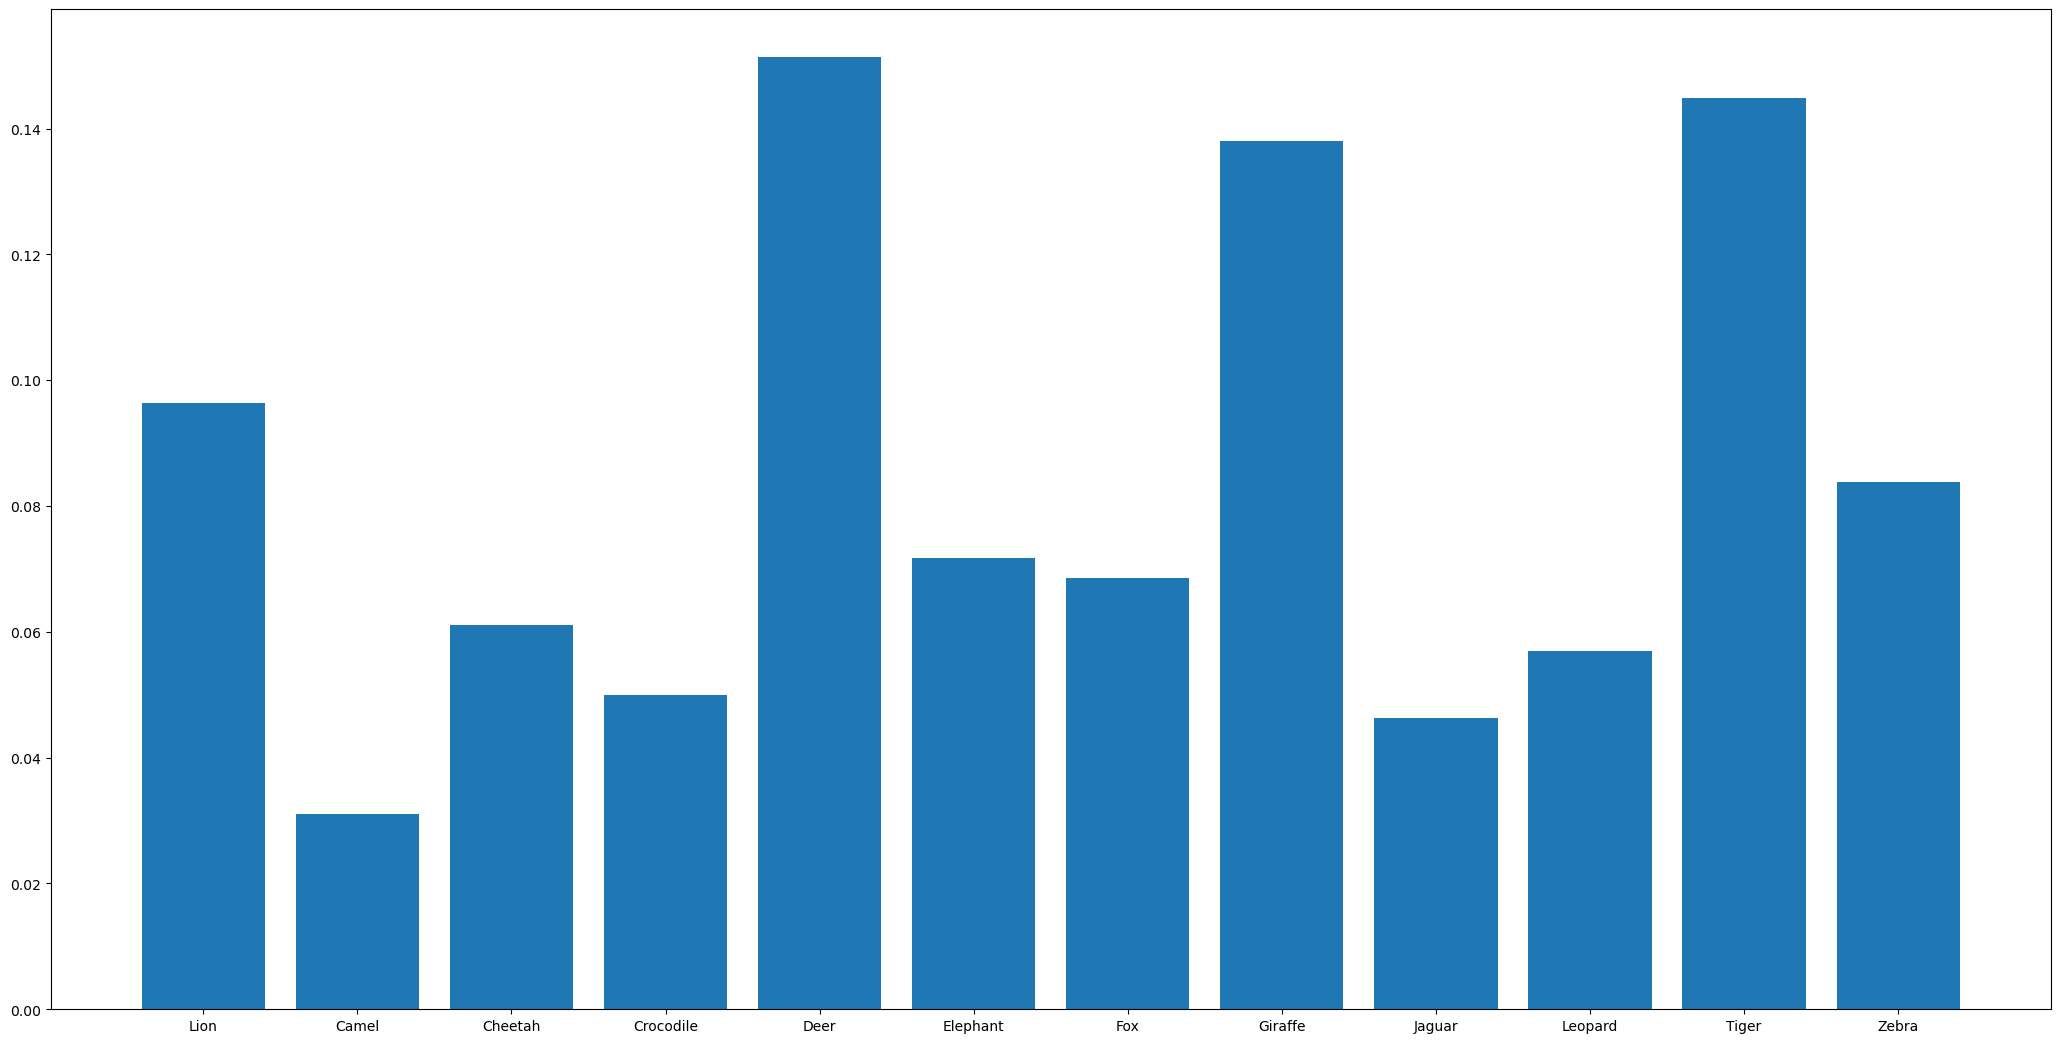

In [4]:
training_images_files_names_lion = len(os.listdir("../input/animals-detection-images-dataset/test/Lion"))-1
training_images_files_names_camel = len(os.listdir("../input/animals-detection-images-dataset/test/Camel"))-1
training_images_files_names_cheetah = len(os.listdir("../input/animals-detection-images-dataset/test/Cheetah"))-1
training_images_files_names_crocodile = len(os.listdir("../input/animals-detection-images-dataset/test/Crocodile"))-1
training_images_files_names_deer = len(os.listdir("../input/animals-detection-images-dataset/test/Deer"))-1
training_images_files_names_elephant = len(os.listdir("../input/animals-detection-images-dataset/test/Elephant"))-1
training_images_files_names_fox = len(os.listdir("../input/animals-detection-images-dataset/test/Fox"))-1
training_images_files_names_giraffe = len(os.listdir("../input/animals-detection-images-dataset/test/Giraffe"))-1
training_images_files_names_jaguar = len(os.listdir("../input/animals-detection-images-dataset/test/Jaguar"))-1
training_images_files_names_leopard = len(os.listdir("../input/animals-detection-images-dataset/test/Leopard"))-1
training_images_files_names_tiger = len(os.listdir("../input/animals-detection-images-dataset/test/Tiger"))-1
training_images_files_names_zebra = len(os.listdir("../input/animals-detection-images-dataset/test/Zebra"))-1
print("Lion sample size : ",training_images_files_names_lion,"\n")
print("Camel sample size : ",training_images_files_names_camel,"\n")
print("Cheetah sample size : ",training_images_files_names_cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_crocodile,"\n")
print("Deer sample size : ",training_images_files_names_deer,"\n")
print("Elephant sample size : ",training_images_files_names_elephant,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Giraffe sample size : ",training_images_files_names_giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_leopard,"\n")
print("Tiger sample size : ",training_images_files_names_tiger,"\n")
print("Zebra sample size : ",training_images_files_names_zebra,"\n")
validation_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size]
print("validation data size:",validation_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"],occurences)

In [5]:
animals_detect=["Lion","Camel", "Cheetah", "Crocodile", "Deer", "Elephant", "Fox", "Giraffe", "Jaguar", "Leopard", "Tiger", "Zebra"]

In [6]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [7]:
!cd ./
!ls

__notebook__.ipynb  yolo


In [8]:
size = (640,640)
for animal_specie in animals_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img) 

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img) 

In [9]:
animals_detect = ["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"]
animals_encoding = {"Lion":0,"Camel":1,"Cheetah":2,"Crocodile":3,"Deer":4,"Elephant":5,"Fox":6,"Giraffe":7,"Jaguar":8,"Leopard":9,"Tiger":10,"Zebra":11}

In [10]:
def process_files(input_files_path,output_files_path):
    for animal_specie in animals_detect:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = animals_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")

In [11]:
process_files("../input/animals-detection-images-dataset/train","yolo/train/labels")
##now for the  train test
process_files("../input/animals-detection-images-dataset/test","yolo/test/labels")

In [12]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15535, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 15535 (delta 53), reused 119 (delta 43), pack-reused 15393
Receiving objects: 100% (15535/15535), 14.53 MiB | 24.47 MiB/s, done.
Resolving deltas: 100% (10582/10582), done.
/kaggle/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20

In [13]:
%ls

CITATION.cff     README.zh-CN.md  detect.py   requirements.txt  tutorial.ipynb
CONTRIBUTING.md  benchmarks.py    export.py   segment/          utils/
LICENSE          classify/        hubconf.py  setup.cfg         val.py
README.md        data/            models/     train.py


In [14]:
!cat data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handb

In [15]:
!touch data/animals.yaml
%ls data

Argoverse.yaml        SKU-110K.yaml  coco.yaml         images/
GlobalWheat2020.yaml  VOC.yaml       coco128-seg.yaml  scripts/
ImageNet.yaml         VisDrone.yaml  coco128.yaml      xView.yaml
Objects365.yaml       animals.yaml   hyps/


In [16]:
"""
path: ../yolo
train: train/images  # train images (relative to 'path') 128 images
val: test/images  # val images (relative to 'path') 128 images
names:
  0: Lion
  1: Camel
  2: Cheetah
  3: Crocodile
  4: Deer
  5: Elephant
  6: Fox
  7: Giraffe
  8: Jaguar
  9: Leopard
  10:Tiger
  11: Zebra
"""

"\npath: ../yolo\ntrain: train/images  # train images (relative to 'path') 128 images\nval: test/images  # val images (relative to 'path') 128 images\nnames:\n  0: Lion\n  1: Camel\n  2: Cheetah\n  3: Crocodile\n  4: Deer\n  5: Elephant\n  6: Fox\n  7: Giraffe\n  8: Jaguar\n  9: Leopard\n  10:Tiger\n  11: Zebra\n"

In [17]:
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Lion"+"\n")
    yaml_file.write(" 1: Camel"+"\n")
    yaml_file.write(" 2: Cheetah"+"\n")
    yaml_file.write(" 3: Crocodile"+"\n")
    yaml_file.write(" 4: Deer"+"\n")
    yaml_file.write(" 5: Elephant"+"\n")
    yaml_file.write(" 6: Fox"+"\n")
    yaml_file.write(" 7: Giraffe"+"\n")
    yaml_file.write(" 8: Jaguar"+"\n")
    yaml_file.write(" 9: Leopard"+"\n")
    yaml_file.write(" 10: Tiger"+"\n")
    yaml_file.write(" 11: Zebra"+"\n")

In [18]:
!ls

CITATION.cff	 README.zh-CN.md  detect.py   requirements.txt	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   segment		utils
LICENSE		 classify	  hubconf.py  setup.cfg		val.py
README.md	 data		  models      train.py


In [19]:
!python train.py --img 640 --batch 32 --epochs 30 --data animals.yaml --weights yolov5s.pt --project runs/train

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=animals.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytic

In [20]:
%cp /kaggle/working/yolov5/runs/train/exp/weights/best.pt /kaggle/working/